In [93]:
import pandas as pd
import numpy as np
import random
import random
from tqdm.auto import tqdm
import scipy.stats as sts
import matplotlib.pyplot as plt

Задача 1
Брошено две монеты. Найти вероятность того, что монеты выпали разными сторонами

In [94]:
 # задаю массив, будем использовать в качестве аргумента в np.random.choice, пусть орлу соответствует 1, решке 0

x = np.array([0, 1])

#количество подбрасываний одной и второй монеты

n = 100000


# суммирую результат подбрасывания, нам интересны результаты 0+1 и 1+0, то есть единица в ответе при подбрасываниях поочередных
# из первой и второй последовательностей

o = list(map( lambda x, y: x + y, np.random.choice(x, n), np.random.choice(x, n)))

print(f'"Вероятность события:"{o.count(1)/n}')


"Вероятность события:"0.49784


Задача 2
Брошено три монеты. Описать множество всех элементарных событий. Найти вероятности следующих событий:

A = {не выпало ни одного герба}
B = {выпало четное число гербов}
C = {на третьей монете выпал герб}

In [97]:
# решаю аналогично первому заданию

 # задаю массив, будем использовать в качестве аргумента в np.random.choice, пусть орлу соответствует 1, решке 0

x = np.array([0, 1])

#количество подбрасываний одной и второй и третьей монет

n = 100000

# добавляю случайные события для третьей монеты


# здесь правомерным будет допущение о том, что монеты бросаются разными людьми одновременно и
# результаты фиксируются, в целом, эксперимент не пострадает

o = list(np.random.choice(x, n))

C = list(map(lambda x, y: x + y, np.random.choice(x, n), np.random.choice(x, n)))
C1= list(map(lambda x, y: x + y, o, C))



# Соответственно :
# A = {не выпало ни одного герба} - считаем сколько получилось нулей
# B = {выпало четное число гербов} - то есть сколько получилось двоек
# C = {на третьей монете выпал герб} - количество единиц в третьей попытке, 


print(f'"Не выпало ни одного герба:"{C1.count(0)/n}')
print(f'"Выпало четное число гербов:"{C1.count(2)/n}')
print(f'"На третьей монете выпал герб:"{o.count(1)/n}')

"Не выпало ни одного герба:"0.12425
"Выпало четное число гербов:"0.37692
"На третьей монете выпал герб:"0.50183


Задача 3
Из двух претендентов E и L на ответственную должность три члена комиссии должны отобрать одного. Каждый член комиссии должен указать либо одного достойного, либо забраковать обоих. Претендент считается выбранным, если он был признана достойным хотя бы двумя членами комиссии. Найти вероятность событий:

A = {рекомендован L}, B = {рекомендован E}

In [25]:
total = np.array([0, 1, 2])
l = []      #создаю пустой список, будут добавлены случайные события: [[0, 1, 0], ... [2, 2, 2]
N = 100000
r = 0       # будут добавлены уникальные исходы
i = 1
for i in range(N):
    a = list(np.random.choice(total, x))
    if a not in l:
        l.append(list(a))
        if a.count(2) >= 2:
            r += 1
            

print(f'"Множество всех элементарных событий:" {len(l)}')
print(f'"Положительные исходы для В == для А:" {r}')
print(f'"Вероятность положительного исхода для В == для А:" {round(r/len(l), 3)}')




"Множество всех элементарных событий:" 27
"Положительные исходы для В == для А:" 7
"Вероятность положительного исхода для В == для А:" 0.259


Задача 4
Брошено две игральных кости. Описать множество элементарных событий. Найти вероятности событий:

A = {вышло две "шестерки"}

B = {сумма выпавших очков не меньше 11}

C = {не выпала ни одна "шестерка"}

In [30]:
total = np.array([1, 2, 3, 4, 5, 6])
N = 100000
n = 2
l = []      #здесь создаю случайные события - список списков [[6,1], [2,3]] и тд случайным образом, пока пустой
k = 0       #будет добавлено количество событий, при которых не выпала "шестерка"
for i in range(N):
    a = np.random.choice(total, n)
    l.append(list(a))
    if 6 not in list(a):
        k += 1

df = pd.DataFrame(l)
df['sum'] = df[0] + df[1]       #добавляю колонку в DF - сумма очков на кубиках
df
P_double = len(df[df['sum'] == 12])/df.shape[0]     #выбираю сумму равную событию [6, 6]
P_ell = len(df[df['sum'] >= 11])/df.shape[0]        #выбираю сумму равную событию [5, 6] | [6, 5] | [6, 6]



print(f'"вышло две "шестерки":" {round(P_double, 3)}')
print(f'"сумма выпавших очков не меньше 11:" {round(P_ell, 3)}')
print(f'"не выпала ни одна "шестерка"" {round(k/df.shape[0], 3)}')




"вышло две "шестерки":" 0.027
"сумма выпавших очков не меньше 11:" 0.082
"не выпала ни одна "шестерка"" 0.696


Вероятность суммы событий
Задача 5
Брошены две игральные кости. Найти вероятность события D = {выпала хотя бы одна шестёрка}

In [105]:
total, n = np.array([1, 2, 3, 4, 5, 6]), 2
N = 100000
l = []
for i in range(N):
    l.append(list(np.random.choice(total, n)))
df = pd.DataFrame(l)
A = len(df[df[0] == 6]) + len(df[df[1] == 6])     #считаю количество 6 в первой и второй колонках, здесь есть небольшая неточность - событие [6, 6] будет учтено дважды
                                                    
A/df.shape[0]

print(f'"выпала хотя бы одна "шестерка":" {round(A/df.shape[0], 3)}')


"выпала хотя бы одна "шестерка":" 0.332


Задача 6
В телефонном номере три последние цифры стерлись. Считая, что все возможные значения стершихся цифр равновероятны, найти вероятность событий:

A = {Стерлись различные цифры},

B = {Стерлись одинаковые цифры},

C = {Среди стершихся цифр хотя бы две совпадают},

D = {Среди стершихся цифр хотя бы две различны}

In [107]:

A = 0
B = 0
C = 0
D = 0

total = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 0])
l = []
N = 100000
n = 3
a = np.random.choice(total, n)
#горожу ifelse, подругому не знаю, как сделать

for i in tqdm(range(N)):
    a = list(np.random.choice(total, n))
    l.append(a)
    if (a[0] != a[1]) & (a[0] != a[2]) &  (a[1] != a[2]):
        A += 1
    if a[0] == a[1] == a[2]:
        B += 1
    if (a[0] == a[1]) | (a[1] == a[2]) | (a[0] == a[2]):
        C += 1
    if (a[0] != a[1]) or (a[1] != a[2]) or (a[0] != a[2]):
        D += 1
    
print(f'"Стерлись различные цифры":" {A/len(l)}')
print(f'"Стерлись одинаковые цифры":" {B/len(l)}')
print(f'"Среди стершихся цифр хотя бы две совпадают":" {C/len(l)}')
print(f'"Среди стершихся цифр хотя бы две различны":" {D/len(l)}')

#ответ корректный, если обратить внимание на варианты B и D, то их сумма 1




  0%|          | 0/100000 [00:00<?, ?it/s]

"Стерлись различные цифры":" 0.71684
"Стерлись одинаковые цифры":" 0.0094
"Среди стершихся цифр хотя бы две совпадают":" 0.28316
"Среди стершихся цифр хотя бы две различны":" 0.9906


0.9906

Задача 8
Брошены две игральные кости. Найти закон распределения случайной величины , равной сумме выпавших очков. Найти вероятности событий , 

27964

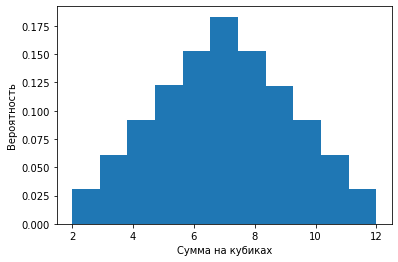

In [109]:
B = np.random.choice(range(1,7), 1000000) + np.random.choice(range(1,7), 1000000) #строю распределение, здесь учитываю только сумму на кубиках
plt.hist(B, bins=len(set(B)), density=True) #здесь непонятен момент, если не задать bins, то гистограмма для случая выпало 12 очков показывает бОльшую вероятость
plt.xlabel('Сумма на кубиках')
plt.ylabel('Вероятность')
list(B).count(12)

In [111]:
#создаю DF, считаю необходимую вероятность

df = pd.DataFrame(B).reset_index() 
A = len(df[df[0] <= 4])/df.shape[0]
B = len(df[df[0] > 4])/df.shape[0]

print(f'"сумма выпавших очков не больше 4:" {len(df[df[0] <= 4])/df.shape[0]}')
print(f'"сумма выпавших очков больше 4:" {len(df[df[0] > 4])/df.shape[0]}')
print(f'"Проверка:" {A + B}')

"сумма выпавших очков не больше 4:" 0.167113
"сумма выпавших очков больше 4:" 0.832887
"Проверка:" 1.0
